## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256, activation="relu")(input_layer)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 820,874
Trainable params: 820,874
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 93us/step - loss: 2.2629 - acc: 0.1689 - val_loss: 2.2036 - val_acc: 0.2090
Epoch 2/500
50000/50000 [==============================] - 3s 51us/step - loss: 2.1665 - acc: 0.2264 - val_loss: 2.1367 - val_acc: 0.2425
Epoch 3/500
50000/50000 [==============================] - 3s 50us/step - loss: 2.1118 - acc: 0.2504 - val_loss: 2.0902 - val_acc: 0.2618
Epoch 4/500
50000/50000 [==============================] - 2s 50us/step - loss: 2.0695 - acc: 0.2682 - val_loss: 2.0522 - val_acc: 0.2773
Epoch 5/500
50000/50000 [==============================] - 3s 54us/step - loss: 2.0355 - acc: 0.2804 - val_loss: 2.0214 - val_acc: 0.2900
Epoch 6/500
50000/50000 [==============================] - 3s 53us/step - loss: 2.0075 - acc: 0.2921 - val_loss: 1.9962 - val_acc: 0.2958
Epoch 7/500
50000/50000 [==============================] - 3s 50us/step - 

Epoch 58/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.6936 - acc: 0.4125 - val_loss: 1.6997 - val_acc: 0.4059
Epoch 59/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.6908 - acc: 0.4132 - val_loss: 1.6961 - val_acc: 0.4064
Epoch 60/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.6881 - acc: 0.4139 - val_loss: 1.6935 - val_acc: 0.4085
Epoch 61/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.6855 - acc: 0.4140 - val_loss: 1.6920 - val_acc: 0.4075
Epoch 62/500
50000/50000 [==============================] - 2s 49us/step - loss: 1.6830 - acc: 0.4155 - val_loss: 1.6897 - val_acc: 0.4074
Epoch 63/500
50000/50000 [==============================] - 3s 53us/step - loss: 1.6805 - acc: 0.4161 - val_loss: 1.6868 - val_acc: 0.4098
Epoch 64/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.6779 - acc: 0.4174 - val_loss: 1.6859 - val_acc: 0.4071
Epoch 65/500
50000/50000 [=

Epoch 117/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.5728 - acc: 0.4546 - val_loss: 1.5929 - val_acc: 0.4402
Epoch 118/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.5712 - acc: 0.4538 - val_loss: 1.5915 - val_acc: 0.4398
Epoch 119/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.5695 - acc: 0.4538 - val_loss: 1.5887 - val_acc: 0.4422
Epoch 120/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.5678 - acc: 0.4553 - val_loss: 1.5889 - val_acc: 0.4397
Epoch 121/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.5667 - acc: 0.4541 - val_loss: 1.5866 - val_acc: 0.4419
Epoch 122/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.5649 - acc: 0.4564 - val_loss: 1.5860 - val_acc: 0.4416
Epoch 123/500
50000/50000 [==============================] - 3s 58us/step - loss: 1.5635 - acc: 0.4568 - val_loss: 1.5837 - val_acc: 0.4426
Epoch 124/500
50000/

50000/50000 [==============================] - 4s 78us/step - loss: 1.4956 - acc: 0.4797 - val_loss: 1.5296 - val_acc: 0.4595
Epoch 176/500
50000/50000 [==============================] - 3s 69us/step - loss: 1.4946 - acc: 0.4797 - val_loss: 1.5287 - val_acc: 0.4610
Epoch 177/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.4935 - acc: 0.4809 - val_loss: 1.5273 - val_acc: 0.4647
Epoch 178/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.4922 - acc: 0.4813 - val_loss: 1.5268 - val_acc: 0.4620
Epoch 179/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.4911 - acc: 0.4816 - val_loss: 1.5258 - val_acc: 0.4634
Epoch 180/500
50000/50000 [==============================] - 3s 50us/step - loss: 1.4898 - acc: 0.4817 - val_loss: 1.5260 - val_acc: 0.4627
Epoch 181/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.4886 - acc: 0.4816 - val_loss: 1.5259 - val_acc: 0.4643
Epoch 182/500
50000/50000 [=======

50000/50000 [==============================] - 2s 48us/step - loss: 1.4340 - acc: 0.5010 - val_loss: 1.4840 - val_acc: 0.4758
Epoch 234/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.4331 - acc: 0.5025 - val_loss: 1.4830 - val_acc: 0.4766
Epoch 235/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.4322 - acc: 0.5017 - val_loss: 1.4868 - val_acc: 0.4770
Epoch 236/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.4314 - acc: 0.5024 - val_loss: 1.4817 - val_acc: 0.4774
Epoch 237/500
50000/50000 [==============================] - 3s 64us/step - loss: 1.4305 - acc: 0.5028 - val_loss: 1.4841 - val_acc: 0.4766
Epoch 238/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.4291 - acc: 0.5032 - val_loss: 1.4825 - val_acc: 0.4784
Epoch 239/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.4283 - acc: 0.5033 - val_loss: 1.4796 - val_acc: 0.4782
Epoch 240/500
50000/50000 [=======

50000/50000 [==============================] - 2s 46us/step - loss: 1.3805 - acc: 0.5198 - val_loss: 1.4515 - val_acc: 0.4860
Epoch 292/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.3795 - acc: 0.5205 - val_loss: 1.4481 - val_acc: 0.4896
Epoch 293/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.3788 - acc: 0.5200 - val_loss: 1.4455 - val_acc: 0.4893
Epoch 294/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.3779 - acc: 0.5218 - val_loss: 1.4462 - val_acc: 0.4904
Epoch 295/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.3770 - acc: 0.5214 - val_loss: 1.4463 - val_acc: 0.4899
Epoch 296/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.3763 - acc: 0.5214 - val_loss: 1.4457 - val_acc: 0.4893
Epoch 297/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.3754 - acc: 0.5214 - val_loss: 1.4458 - val_acc: 0.4885
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 3s 50us/step - loss: 1.3332 - acc: 0.5376 - val_loss: 1.4246 - val_acc: 0.4984
Epoch 350/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.3319 - acc: 0.5384 - val_loss: 1.4174 - val_acc: 0.5006
Epoch 351/500
50000/50000 [==============================] - 3s 52us/step - loss: 1.3310 - acc: 0.5374 - val_loss: 1.4248 - val_acc: 0.4958
Epoch 352/500
50000/50000 [==============================] - 2s 50us/step - loss: 1.3302 - acc: 0.5393 - val_loss: 1.4207 - val_acc: 0.4987
Epoch 353/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.3293 - acc: 0.5387 - val_loss: 1.4175 - val_acc: 0.4986
Epoch 354/500
50000/50000 [==============================] - 3s 68us/step - loss: 1.3286 - acc: 0.5388 - val_loss: 1.4281 - val_acc: 0.4964
Epoch 355/500
50000/50000 [==============================] - 3s 56us/step - loss: 1.3281 - acc: 0.5383 - val_loss: 1.4152 - val_acc: 0.4999
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 3s 61us/step - loss: 1.2891 - acc: 0.5518 - val_loss: 1.3969 - val_acc: 0.5057
Epoch 408/500
50000/50000 [==============================] - 3s 61us/step - loss: 1.2882 - acc: 0.5534 - val_loss: 1.3965 - val_acc: 0.5063
Epoch 409/500
50000/50000 [==============================] - 3s 57us/step - loss: 1.2872 - acc: 0.5540 - val_loss: 1.3940 - val_acc: 0.5062
Epoch 410/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.2867 - acc: 0.5533 - val_loss: 1.3973 - val_acc: 0.5071
Epoch 411/500
50000/50000 [==============================] - 3s 63us/step - loss: 1.2857 - acc: 0.5538 - val_loss: 1.3965 - val_acc: 0.5057
Epoch 412/500
50000/50000 [==============================] - 3s 62us/step - loss: 1.2855 - acc: 0.5540 - val_loss: 1.3958 - val_acc: 0.5053
Epoch 413/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2845 - acc: 0.5548 - val_loss: 1.4007 - val_acc: 0.5024
Epoch 414/500
50000/50000 [=======

50000/50000 [==============================] - 2s 48us/step - loss: 1.2486 - acc: 0.5667 - val_loss: 1.3783 - val_acc: 0.5127
Epoch 466/500
50000/50000 [==============================] - 3s 59us/step - loss: 1.2478 - acc: 0.5680 - val_loss: 1.3788 - val_acc: 0.5105
Epoch 467/500
50000/50000 [==============================] - 3s 60us/step - loss: 1.2469 - acc: 0.5670 - val_loss: 1.3819 - val_acc: 0.5099
Epoch 468/500
50000/50000 [==============================] - 3s 54us/step - loss: 1.2466 - acc: 0.5685 - val_loss: 1.3830 - val_acc: 0.5107
Epoch 469/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.2460 - acc: 0.5682 - val_loss: 1.3775 - val_acc: 0.5116
Epoch 470/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.2446 - acc: 0.5682 - val_loss: 1.3808 - val_acc: 0.5113
Epoch 471/500
50000/50000 [==============================] - 3s 55us/step - loss: 1.2443 - acc: 0.5690 - val_loss: 1.3774 - val_acc: 0.5120
Epoch 472/500
50000/50000 [=======

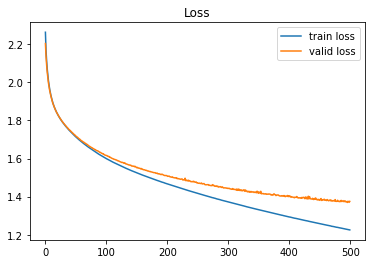

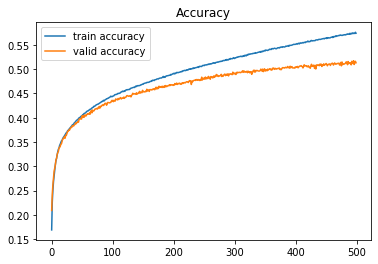

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()